# California Flights 2019
## by (Ahmed Mohamed Zaki)

## Preliminary Wrangling

> This dataset reports flights of California state, of the year of 2019 , 
> Flights that are going into or going outside of California. 


In [21]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

%matplotlib inline

> Load in your dataset 

You can download dataset from [here](https://drive.google.com/drive/u/1/folders/1AQKp7Vt2-WOXwPjQGwCq_TWbSa5zlyZ4).

In [22]:
flights = pd.read_csv('California_Flights_2019.csv')

In [23]:
flights.shape

(1379233, 17)

In [4]:
flights.head()

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN_CITY_NAME,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
0,4,10,23,3,"San Francisco, CA","Kahului, HI",1750,1805.0,15.0,2011,2043.0,32.0,321.0,338.0,2338.0
1,4,10,23,3,"Lihue, HI","San Francisco, CA",2045,2042.0,-3.0,453,449.0,-4.0,308.0,307.0,2447.0
2,4,10,23,3,"Los Angeles, CA","Denver, CO",1812,1817.0,5.0,2135,2146.0,11.0,143.0,149.0,862.0
3,4,10,23,3,"San Francisco, CA","Minneapolis, MN",1730,1725.0,-5.0,2309,2301.0,-8.0,219.0,216.0,1589.0
4,4,10,23,3,"Chicago, IL","San Francisco, CA",1805,1759.0,-6.0,2052,2030.0,-22.0,287.0,271.0,1846.0


In [5]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379233 entries, 0 to 1379232
Data columns (total 15 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   QUARTER              1379233 non-null  int64  
 1   MONTH                1379233 non-null  int64  
 2   DAY_OF_MONTH         1379233 non-null  int64  
 3   DAY_OF_WEEK          1379233 non-null  int64  
 4   ORIGIN_CITY_NAME     1379233 non-null  object 
 5   DEST_CITY_NAME       1379233 non-null  object 
 6   CRS_DEP_TIME         1379233 non-null  int64  
 7   DEP_TIME             1358922 non-null  float64
 8   DEP_DELAY            1358921 non-null  float64
 9   CRS_ARR_TIME         1379233 non-null  int64  
 10  ARR_TIME             1357678 non-null  float64
 11  ARR_DELAY            1355040 non-null  float64
 12  CRS_ELAPSED_TIME     1379233 non-null  float64
 13  ACTUAL_ELAPSED_TIME  1355040 non-null  float64
 14  DISTANCE             1379233 non-null  float64
dty

### Cleanning some issue on the data

In [6]:
# check duplicates 
print ('There was {} duplicates '.format(flights.duplicated().sum()))
#Take a copy from our dataset
clean_flights=flights.copy()
#Remove duplicates
clean_flights.drop_duplicates(inplace=True)

There was 6 duplicates 


In [7]:
# lowercase all the columns names
clean_flights.columns = [column.lower() for column in clean_flights.columns.tolist()]

In [8]:
# split the city and the state 

# origin 
origin_city_state = clean_flights.origin_city_name.str.split(', ')
clean_flights['origin_city_name'] = origin_city_state.apply(lambda _ : _[0])
origin_state_name = origin_city_state.apply(lambda _ : _[1])

origin_index = clean_flights.columns.get_loc("origin_city_name")
clean_flights.insert(loc=origin_index+1, column='origin_state_name', value=origin_state_name)


# destination 
dest_city_state = clean_flights.dest_city_name.str.split(', ')
clean_flights['dest_city_name'] = dest_city_state.apply(lambda _ : _[0])
dest_state_name = dest_city_state.apply(lambda _ : _[1])

dest_index = clean_flights.columns.get_loc("dest_city_name")
clean_flights.insert(loc=dest_index+1, column='dest_state_name', value=dest_state_name)

In [9]:
#Macking data categorical

#Set categories
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
              'November', 'December']

quarteres = ['First', 'Second', 'Third', 'Fourth']

#Make day_of_week categorical

clean_flights['day_of_week'] = clean_flights.day_of_week.apply(lambda _ : calendar.day_name[_-1])
dtype = pd.api.types.CategoricalDtype(categories=days, ordered=True)
clean_flights['day_of_week'] = clean_flights['day_of_week'].astype(dtype)

#Make month categorical

clean_flights['month'] = clean_flights.month.apply(lambda _ : calendar.month_name[_])
dtype = pd.api.types.CategoricalDtype(categories=months, ordered=True)
clean_flights['month'] = clean_flights['month'].astype(dtype)

#Make quarters categorical

clean_flights['quarter'] = clean_flights['quarter'].astype(str)
conversions = {'1' : 'First', '2' : 'Second', '3' : 'Third', '4' : 'Fourth'}
clean_flights['quarter'] = clean_flights.quarter.apply(lambda x : conversions[x])

dtype = pd.api.types.CategoricalDtype(categories=quarteres, ordered=True)
clean_flights['quarter'] = clean_flights['quarter'].astype(dtype)

In [10]:
# Remove nan values from actual_elapsed_time
clean_flights.dropna(subset = ["actual_elapsed_time"] , inplace = True);

In [11]:
clean_flights.head()

,quarter,month,day_of_month,day_of_week,origin_city_name,origin_state_name,dest_city_name,dest_state_name,crs_dep_time,dep_time,dep_delay,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,distance
0,Fourth,October,23,Wednesday,San Francisco,CA,Kahului,HI,1750,1805.0,15.0,2011,2043.0,32.0,321.0,338.0,2338.0
1,Fourth,October,23,Wednesday,Lihue,HI,San Francisco,CA,2045,2042.0,-3.0,453,449.0,-4.0,308.0,307.0,2447.0
2,Fourth,October,23,Wednesday,Los Angeles,CA,Denver,CO,1812,1817.0,5.0,2135,2146.0,11.0,143.0,149.0,862.0
3,Fourth,October,23,Wednesday,San Francisco,CA,Minneapolis,MN,1730,1725.0,-5.0,2309,2301.0,-8.0,219.0,216.0,1589.0
4,Fourth,October,23,Wednesday,Chicago,IL,San Francisco,CA,1805,1759.0,-6.0,2052,2030.0,-22.0,287.0,271.0,1846.0


In [12]:
# Save our cleaned dataset in csv file 
clean_flights.to_csv('slide_deck.csv', index=False)

### What is the structure of your dataset?

- Departure delay, in minutes.
- Was the flight canceled? 
- what is the reason for the cancellation?
- origin city and state of the flight.
- Distance of the flight.
- Month of flight.
- Day of month.
- Scheduled and actual arrival time.
- destination city and state of the flight.
- Scheduled and actual departure time.
- Day of week.
- Quarter of year.
- Arrival delay, in minutes.
- Scheduled and actual elapsed time.


### What is/are the main feature(s) of interest in your dataset?
- QUARTER
- MONTH
- DAY_OF_MONTH
- DAY_OF_WEEK
- DEP_TIME (departure time)
- ARR_TIME (arrival time)
- DISTANCE

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
- DISTANCE
- crs_arr_time (scheduled arrival time (local, hhmm)).
- arr_time (actual arrival time (local, hhmm)).
- crs_dep_time (scheduled departure time (local, hhmm)).
- dep_time (actual departure time (local, hhmm)).
- crs_elapsed_time(scheduled departure time (local, hhmm)).
- actual_elapsed_time (actual departure time (local, hhmm))	.
- origin_city_name (The origin city and state of the flight).

## Univariate Exploration

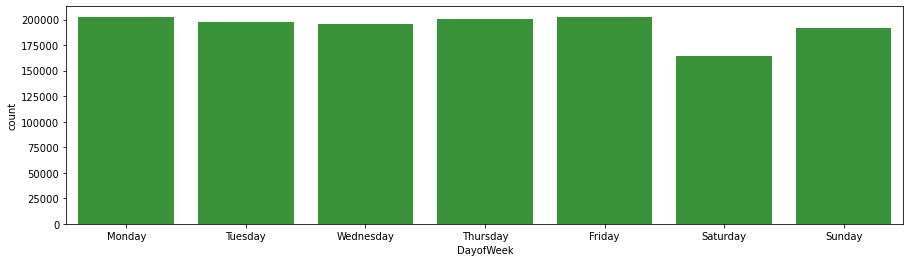

In [13]:
# Bar plot
plt.figure(figsize=[15,4])
base_color = sns.color_palette()[2]
sns.countplot(data = clean_flights, x = 'day_of_week', color = base_color)
plt.xlabel('DayofWeek');

> the weekend days have the least flights

[(150000.0, 400000.0)]

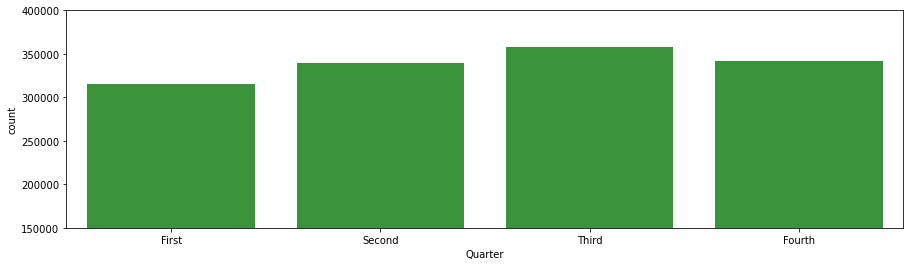

In [14]:
# Bar plot
plt.figure(figsize=[15,4])
base_color = sns.color_palette()[2]
plot = sns.countplot(data = clean_flights, x = 'quarter', color = base_color)
plt.xlabel('Quarter');
plot.set(ylim=(150000, 400000))


> the first and the Fourth quarters of the year have the lowest ratio of flights

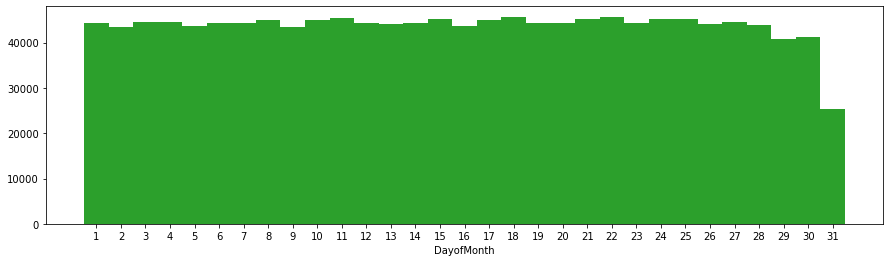

In [15]:
# Histogram plot
plt.figure(figsize=[15,4])
bin_edges = np.arange(0.5, 32, 1)
plt.hist(data = clean_flights, x = 'day_of_month',bins = bin_edges , color = base_color)
plt.xlabel('DayofMonth')
plt.xticks(np.arange(1, 32, 1));

> There are fewer flights in the last days of the month.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- I was expecting weekend trips to be more than working days, but our data says that vacation trips are less than business trips and this is a little unexpected


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- I've made some adjustments that might help you analyze your data:
- I have changed the Quarter and Day type of Month and Week to Categorical.
- I have removed some duplicate data so as not to affect the analysis process.
- I have divided the origin and destination of the trip from the figure (city, state) in one variable, to put them in two separate variables.

## Bivariate Exploration


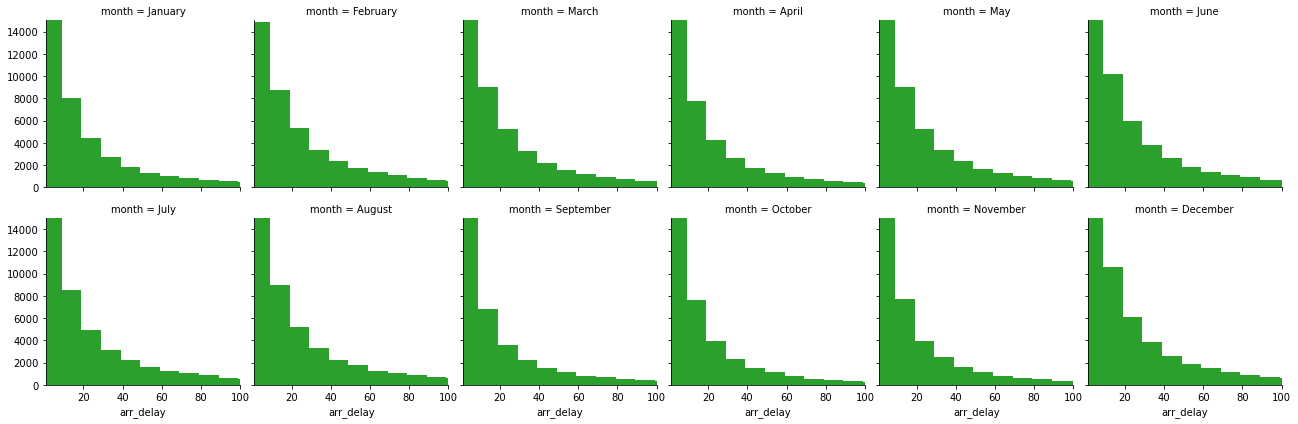

In [16]:
bin_edges = np.arange(clean_flights.arr_delay.min(), clean_flights.arr_delay.max()+10, 10)
base_color = sns.color_palette()[2]
g = sns.FacetGrid(data = clean_flights, col = 'month', col_wrap = 6)
g.map(plt.hist, 'arr_delay', bins = bin_edges , color = base_color)
plt.xlim(1,100)
plt.ylim(0,15000);

>June and December have more delays in their flights than the others.

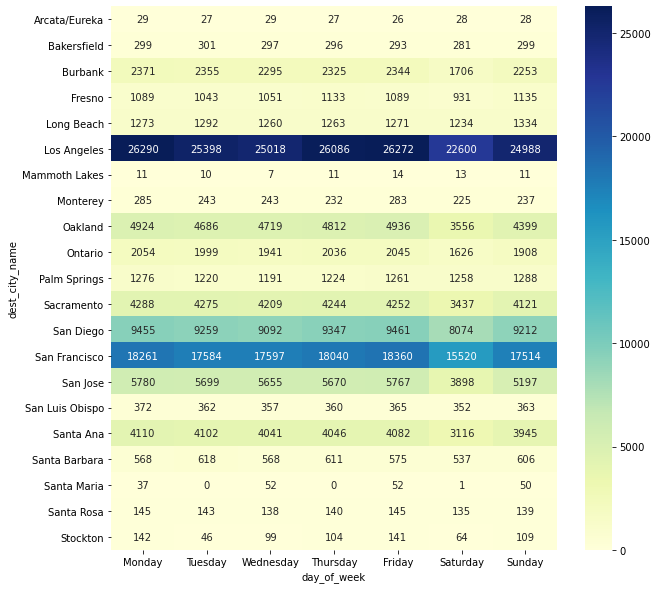

In [17]:
# Heat map
plt.figure(figsize=[10,10])
# taking the California destination of the flights 
toca_clean_flights = clean_flights[(clean_flights.dest_state_name == 'CA') & 
                                  (clean_flights.origin_state_name != 'CA')]
ct_counts = toca_clean_flights.groupby(['day_of_week', 'dest_city_name']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'dest_city_name', columns = 'day_of_week', values = 'count')

sns.heatmap(ct_counts, annot = True, fmt = 'd',  cmap="YlGnBu");



> We can see that Los Angles  has the very best variety of flights coming to it over the entire week from outside of California, during the week, with the city of San Francisco in second place and San Diago in third place.

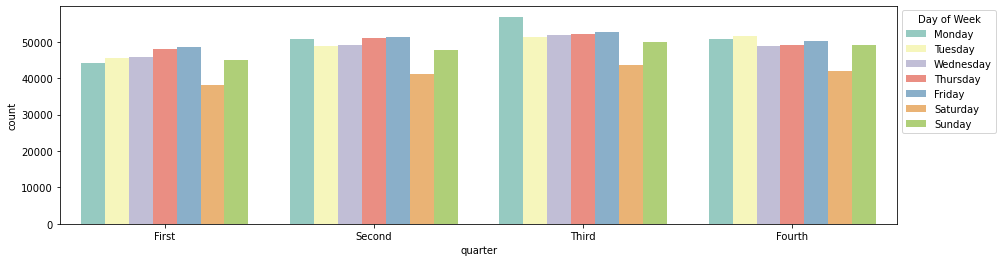

In [18]:
# Clustered Bar Chart
plt.figure(figsize=[15,4])
plot = sns.countplot(data = clean_flights, x = 'quarter', hue = 'day_of_week' , palette="Set3" )
plot.legend(loc='center left', bbox_to_anchor=(1, 0.7), title = 'Day of Week');

> We see that Friday is the day when people have the most flights in the first quarter of the year.
and Monday is the most day that people having flights on in the Third quarter of the year.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In the last graph we find that Saturday is the smallest day of the week in terms of the number of flights in all quarters of the year. The number of flights also increases relatively steadily between Wednesday and Friday. We also find that the city of Santa Maria and Mammoth Lakes have the fewest flights during the week.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [20]:
# Correlation Matrices
plt.figure(figsize=[15,4])
correl_clean_flights = clean_flights.corr().drop('cancelled', axis=0)
correl_clean_flights = correl_clean_flights.drop('cancelled', axis=1)
sns.heatmap(correl_clean_flights, annot = True, fmt = '.2f', cmap = 'YlGnBu', center = 0);

NameError: name 'correl_clean_flights' is not defined

<Figure size 1080x288 with 0 Axes>

> We see that there's a excessive correlation among the scheduled and the actual times, that's expected. But a greater considerable thing that there's no correlation among the day of the month of the flight and the alternative features.

In [ ]:
# Adapted heat map
plt.figure(figsize=[10,5])
#local flights
local_clean_flights = clean_flights[(clean_flights.origin_state_name == 'CA') & (clean_flights.dest_state_name == 'CA')]
Local_means = local_clean_flights.groupby(['quarter', 'dest_city_name']).mean()['arr_delay']
Local_means = Local_means.reset_index(name = 'arr_delay_avg')
Local_means = Local_means.pivot(index = 'dest_city_name', columns = 'quarter', values = 'arr_delay_avg')
sns.heatmap(Local_means, annot = True, fmt = '.3f',cmap = 'YlGnBu', cbar_kws = {'label' : 'mean of arr_delay'});


> For the First quarter, the city of Mammoth Lakes seems to own the best average arrival delay for the destination city for local flights. it also true for bakersfield for the second and third quarters. And it appears that the city of San Luis Obispo has the longest average late arrival within the fourth quarter.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> From the clustered bar chart we have a tendency to see that Tuesdays sometimes have the smallest amount average time of departure delay between the opposite days over the months. Also, it's just like the second quarter has the most effective magnitude relation of averages time of arrival for all the cities for the local flights compared to the other quarters.
### Were there any interesting or surprising interactions between features?

> It looks like there aren't such a lot of correlations or attention-grabbing correlations between the quantitative features. however we tend to determined such a lot careful data once utilizing it with alternative features.